In [37]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tridiagonal
import vapsRichardson


rmin = -5.0
rmax = 5.0
Ninter = np.array([100,200,500,1000,2000,5000])
n1 = 1
n2 = 4

#Mostra de la convergencia de l'algorisme de la tridiagonal a mesura que creix el nombre d'intervals

for p in range(1,7):
    
    Ninterv = Ninter[p-1]
    h = (rmax - rmin)/Ninterv
    n = Ninterv - 1

    v = np.zeros(n)
    x = np.zeros(n)
    lamb = 6
    Vo = lamb*(lamb-1)

    for k in range(1,n+1):
        v[k-1] = -Vo/((np.cosh(rmin + k*h))**2)
        x[k-1] = rmin + k*h 

    vaps = tridiagonal.tridiagonal(v,h,n,n1,n2)

    print('Tridiagonal amb n =',Ninterv,vaps)



Tridiagonal amb n = 100 [-25.01389972 -16.05150669  -9.08896123  -4.09647595]
Tridiagonal amb n = 200 [-25.00346377 -16.01279929  -9.0220176   -4.02373068]
Tridiagonal amb n = 500 [-25.00055371 -16.00204447  -9.00351304  -4.00377439]
Tridiagonal amb n = 1000 [-25.00013841 -16.000511    -9.00087791  -4.00093782]
Tridiagonal amb n = 2000 [-25.0000346  -16.00012774  -9.00021945  -4.00022923]
Tridiagonal amb n = 5000 [-25.00000554 -16.00002044  -9.00003511  -4.00003087]


In [4]:
Ninter = 1000

h = (rmax - rmin)/Ninter
n = Ninter - 1

v = np.zeros(n)
x = np.zeros(n)

#Valors propis analitics

Ean = np.zeros(n2)lamb = 6
Vo = lamb*(lamb-1)

Ean = np.zeros(n2)

for k in range(n1,n2):

    Ean[k-1] = -(np.sqrt(Vo + 1/4) - ((k-1) + 1/2))**2

Ean[3] = -(np.sqrt(Vo + 1/4) - (3 + 1/2))**2
print('Analític ',Ean)

#Valors propis pel metode de la tridiagonal

for k in range(1,n+1):
    v[k-1] = -Vo/((np.cosh(rmin + k*h))**2)
    x[k-1] = rmin + k*h 

vaps = tridiagonal.tridiagonal(v,h,n,n1,n2)

print('Tridiagonal ',vaps)

#Valors propis amb extrapolacio de Richardson

error = 1e-8

valp = vapsRichardson.vapsRichardson(rmin,rmax,Ninter,n1,n2,error)
print('Richardson ',valp)

Analític  [-25. -16.  -9.  -4.]
Tridiagonal  [-25.00013841 -16.000511    -9.00087791  -4.00093782]
Richardson  [-25.         -15.99999999  -8.99999997  -3.99999304]


Text(0.5,1,'Excited states depending on the potential depth')

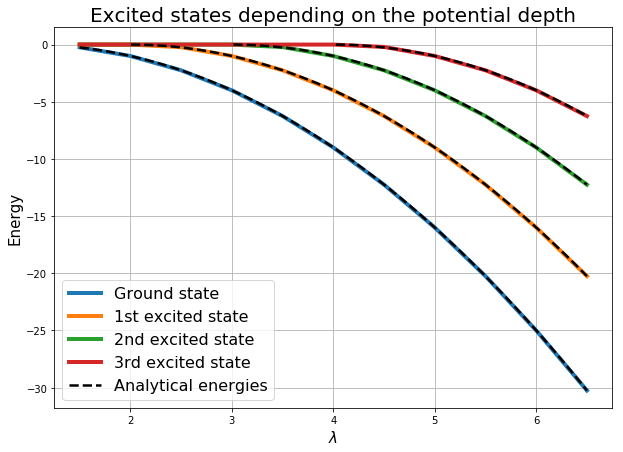

In [48]:
rmin = -5.0
rmax = 5.0
Ninter = 1000
n1 = 1
n2 = 4

h = (rmax - rmin)/Ninter
n = Ninter - 1

#Calcul dels valors propis per varis minims de potencial, per veure aixi quan apareixen nous estats lligats

v = np.zeros(n)
x = np.zeros(n)
lambd = np.array([1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5])
    
matrixvaps = np.zeros((11,4))
    
for p in range(1,12):    
    
    lamb = lambd[p-1]
    Vo = lamb*(lamb-1)

    for k in range(1,n+1):
        v[k-1] = -Vo/((np.cosh(rmin + k*h))**2)
        x[k-1] = rmin + k*h 

    vaps = tridiagonal.tridiagonal(v,h,n,n1,n2)
    #print(vaps)
    matrixvaps[p-1,:] = vaps   

#Els valors propis positius no corresponen a estats lligats, i per tant son fisicament descartables    
    
for i in range(1,10):
    for j in range(1,5):
        if (matrixvaps[i-1,j-1] > 0):
            matrixvaps[i-1,j-1] = 0

#print(matrixvaps)

#Calcul de les energies analitiques per cada minim de potencial

matrixvapsan = np.zeros((100,4))
lamb = np.linspace(1.5,6.5,100)
for g in range(1,101):

    Vo = lamb[g-1]*(lamb[g-1]-1)

    for k in range(n1,n2+1):

        matrixvapsan[g-1,k-1] = -(np.sqrt(Vo + 1/4) - ((k-1) + 1/2))**2

plt.figure(figsize=(10,7))
plt.plot(lambd,matrixvaps[:,0],linewidth=4.0)
plt.plot(lambd,matrixvaps[:,1],linewidth=4.0)
plt.plot(lambd,matrixvaps[:,2],linewidth=4.0)
plt.plot(lambd,matrixvaps[:,3],linewidth=4.0)
plt.plot(lamb,matrixvapsan[:,0],'k--',linewidth=2.5)
plt.plot(lamb[10:100],matrixvapsan[10:100,1],'k--',linewidth=2.5)
plt.plot(lamb[30:100],matrixvapsan[30:100,2],'k--',linewidth=2.5)
plt.plot(lamb[50:100],matrixvapsan[50:100,3],'k--',linewidth=2.5)
plt.legend(('Ground state','1st excited state','2nd excited state','3rd excited state','Analytical energies'),loc='lower left',fontsize=13,prop={'size': 16})
plt.xlabel(r'$\lambda$',fontsize=15)
plt.ylabel('Energy',fontsize=15)
plt.grid()

plt.title('Excited states depending on the potential depth',fontsize=20)

